In [20]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path).drop(["Unnamed: 0"], axis=1)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
crypto_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
traded_df = crypto_df[crypto_df["IsTrading"]==True].drop(["IsTrading"], axis=1)
traded_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
dropped_df = traded_df.dropna().drop(["CoinName"], axis = 1)
dropped_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [6]:
X = pd.get_dummies(dropped_df, columns= ["Algorithm","ProofType"])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rows and columns are checked after applied pd.dummies: 
####  from 685 rows x 4 columns to 685 rows x 109 columns

In [7]:
list(X.columns)

['TotalCoinsMined',
 'TotalCoinSupply',
 'Algorithm_1GB AES Pattern Search',
 'Algorithm_536',
 'Algorithm_Argon2',
 'Algorithm_Argon2d',
 'Algorithm_BLAKE256',
 'Algorithm_Blake',
 'Algorithm_Blake2S',
 'Algorithm_Blake2b',
 'Algorithm_C11',
 'Algorithm_Cloverhash',
 'Algorithm_Counterparty',
 'Algorithm_CryptoNight',
 'Algorithm_CryptoNight Heavy',
 'Algorithm_CryptoNight Heavy X',
 'Algorithm_CryptoNight-Lite',
 'Algorithm_CryptoNight-V7',
 'Algorithm_Cryptonight-GPU',
 'Algorithm_DPoS',
 'Algorithm_Dagger',
 'Algorithm_Dagger-Hashimoto',
 'Algorithm_ECC 256K1',
 'Algorithm_Equihash',
 'Algorithm_Equihash+Scrypt',
 'Algorithm_Equihash1927',
 'Algorithm_Ethash',
 'Algorithm_Exosis',
 'Algorithm_Green Protocol',
 'Algorithm_Groestl',
 'Algorithm_HMQ1725',
 'Algorithm_HybridScryptHash256',
 'Algorithm_IMesh',
 'Algorithm_Jump Consistent Hash',
 'Algorithm_Keccak',
 'Algorithm_Leased POS',
 'Algorithm_Lyra2RE',
 'Algorithm_Lyra2REv2',
 'Algorithm_Lyra2Z',
 'Algorithm_M7 POW',
 'Algorith

In [8]:
X = StandardScaler().fit_transform(X)
X

array([[-0.10282804, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.07661326, -0.03823825, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282804, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       ...,
       [-0.0784756 , -0.03823801, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10264677, -0.0382384 , -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282485, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596]])

# PCA Analysis

In [9]:
pca = PCA(n_components=0.90)
pca_values = pca.fit_transform(X)
pca_values

array([[-2.26930761e-01,  1.23328568e+00, -4.94638629e-01, ...,
        -5.37793785e-13,  1.38362738e-13, -9.74548600e-13],
       [-2.12510663e-01,  1.23187740e+00, -4.95250283e-01, ...,
        -5.37905464e-13,  1.38079284e-13, -9.74775908e-13],
       [-1.56502164e-01,  8.20326142e-01, -3.04937434e-01, ...,
        -5.48747225e-15,  2.53757489e-15,  2.38078700e-15],
       ...,
       [-1.21196009e-01, -2.31411034e+00,  2.84863433e-01, ...,
        -4.30339610e-14,  1.85951642e-15, -2.32524014e-15],
       [-2.77781887e-01, -2.03037929e+00,  2.62190990e-01, ...,
        -5.37387400e-13,  1.42533122e-13, -9.71116231e-13],
       [-8.93481494e-02,  7.76901750e-01, -2.04001486e-01, ...,
        -5.35112204e-13,  1.41270084e-13, -9.67691549e-13]])

In [13]:
pca_crypto_df = pd.DataFrame(pca_values)
pca_crypto_df

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,-0.226931,1.233286,-0.494639,-3.074212e-07,-2.602398e-11,-3.355320e-11,1.566627e-10,-1.630707e-10,0.015015,-1.108822,...,9.152544e-13,-1.049395e-12,5.467967e-15,1.513146e-13,-2.481427e-13,2.597253e-15,1.845637e-15,-5.377938e-13,1.383627e-13,-9.745486e-13
1,-0.212511,1.231877,-0.495250,-3.074213e-07,-2.602407e-11,-3.355403e-11,1.566630e-10,-1.630708e-10,0.013635,-1.111887,...,9.157412e-13,-1.048849e-12,5.864786e-15,1.509328e-13,-2.478150e-13,1.513625e-15,2.598264e-15,-5.379055e-13,1.380793e-13,-9.747759e-13
2,-0.156502,0.820326,-0.304937,-2.267268e-07,-1.919515e-11,-2.474405e-11,1.155423e-10,-1.202679e-10,-0.001711,-0.625905,...,-2.818250e-15,-1.737587e-15,1.352742e-14,2.643666e-15,-6.736039e-15,-7.991595e-16,-2.107353e-15,-5.487472e-15,2.537575e-15,2.380787e-15
3,0.284201,1.971340,-0.537186,-4.518587e-07,-3.825704e-11,-4.929794e-11,2.302744e-10,-2.396894e-10,-0.030183,-0.827578,...,-2.713134e-15,4.520021e-14,-4.628240e-15,-3.421909e-15,-1.117223e-13,-1.747398e-14,5.740573e-14,9.398458e-15,1.323118e-14,6.831716e-14
4,-0.208425,-1.471116,0.135380,1.813074e-07,1.535371e-11,1.978531e-11,-9.240042e-11,9.617588e-11,-0.004237,0.064427,...,-3.639221e-15,-4.800891e-16,1.276257e-14,1.826938e-15,-1.204716e-14,-2.219771e-15,1.369863e-16,-2.737046e-15,4.327644e-15,4.203434e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,4.075540,-0.136391,-0.097843,-8.429474e-08,-7.148842e-12,-9.180010e-12,4.294139e-11,-4.468843e-11,-1.094977,0.736512,...,-8.041074e-15,2.931014e-15,1.500163e-14,1.925066e-15,-1.027644e-14,-1.482288e-15,-5.749293e-16,-1.112615e-15,4.798013e-15,2.809858e-15
681,-0.226727,1.233266,-0.494647,-3.074212e-07,-2.602399e-11,-3.355358e-11,1.566628e-10,-1.630708e-10,0.014996,-1.108865,...,9.156443e-13,-1.048814e-12,5.694613e-15,1.509764e-13,-2.478678e-13,1.843748e-15,2.206804e-15,-5.380909e-13,1.381287e-13,-9.747092e-13
682,-0.121196,-2.314110,0.284863,3.476581e-07,2.943994e-11,3.793336e-11,-1.771770e-10,1.844178e-10,-0.001641,-0.011329,...,-2.901949e-14,2.514261e-14,7.685279e-14,1.531928e-15,-3.581654e-15,1.925237e-14,-5.113589e-14,-4.303396e-14,1.859516e-15,-2.325240e-15
683,-0.277782,-2.030379,0.262191,3.014883e-07,2.552964e-11,3.289894e-11,-1.536469e-10,1.599275e-10,0.017138,0.161203,...,9.138849e-13,-1.049797e-12,-8.934295e-16,1.490397e-13,-2.534988e-13,-3.063138e-15,3.559152e-15,-5.373874e-13,1.425331e-13,-9.711162e-13


### dataframe from 685 rowsx x 109 columns to 685 rows x 84 columns 

###  Reducing the dataset dimensions with t-SNE and visually inspect the results. 

In [59]:
tsne = TSNE(learning_rate=35)

In [60]:
tsne_features = tsne.fit_transform(pca_crypto_df)

In [61]:
tsne_features.shape

(685, 2)

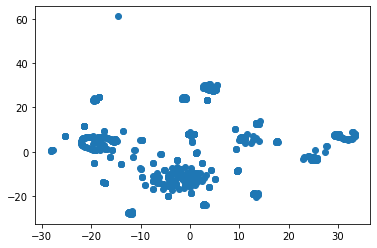

In [49]:
plt.scatter(tsne_features[:, 0], tsne_features[:,1])
plt.show()

### Visually, there are clusters, but sizes are big and smaller clusters. 


In [66]:
len(pca_crypto_df)

685

In [67]:
pca_crypto_df.columns

RangeIndex(start=0, stop=84, step=1)

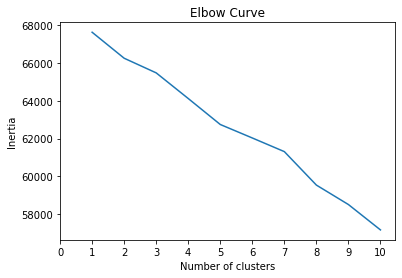

In [58]:
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(pca_crypto_df)
    inertia.append(km.inertia_)
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### 1. Crypto currencies can be clustered if see t-sne visual clustering. Cluster pattern is one big cluster and varies small clusters occurs. 
### 2. When to find out better clustering of elbow method, the linearity bends slightly at x = 1 2,3,5,7,8. The most notable bending occured at k=7. k= 7 could be the best number of cluster. 